### This code ensures that we can load our own external modules

In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('../'))

### Loading all of the external modules that we have built 

In [2]:
from src.modules.dataset import Dataset
from src.modules.plotter import Plotter

### Loading The data using our own custom data loader and parser

The data was shuffeled to ensure the model won't be biased towards a certain order. And to accurately split the data into two subsets.

In [3]:
dataset = Dataset(
    os.path.join(os.getcwd(), '../datasets/classification_data.csv'),
    ['x_1', 'x_2'],
    'y',
    shuffle=True
)

In [4]:
print(f'Dataset Size: {len(dataset.inputs)}')

Dataset Size: 300


# Question1: please split your dataset into training and testing.
We have used 30% of the data to be our testing sample and the rest 70% for training 

In [5]:
training_inputs, testing_inputs, training_outputs, testing_outputs = dataset.split_data(testing_size=0.3)

### 1.1 - How many features do you’ve? Cite them.

We have two features which are:

In [6]:
print(dataset.input_labels)

['x_1', 'x_2']


### 1.2 - How many classes do you have ?

We have two classes 0 and 1

### 1.3 - How many training/testing examples do you’ve?

In [7]:
print(f'Training Data Size: {len(training_inputs)}', f'Testing Sample Size: {len(testing_inputs)}')

Training Data Size: 210 Testing Sample Size: 90


### 1.4 - Check if there is any missing data.

We have created a helper on our dataset module that returns False if one of the feature found null. And True if no null value exists.

In [8]:
print(dataset.check_null_inputs())

True


## Use scatter plot to represent your training dataset

We have created our own plotting module that's going to make things easier for us down the line to plot things from the model directly

The Plotter Module takes in the model and all of the samples as parameters

In [9]:
plotter = Plotter(
    None,
    training_inputs.copy(),
    training_outputs.copy(),
    testing_inputs.copy(),
    testing_outputs.copy()
)

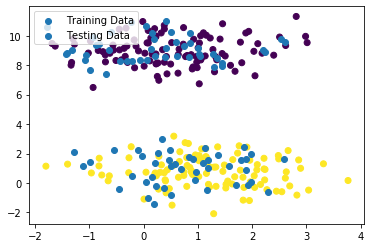

In [10]:
plotter.scatter_data_for_classification(dataset.min(column='x_1'), dataset.max(column='x_2'), no_model=True)

## What’s the nature of this data? Is it supervised or semi-supervised learning? Justify your response.

It is supervised, as all of the data is labeled/does have a y value.

## Question4: Cite all evaluation metrics possible which we could apply for this kind of data.

- Mean Squared Error
- Mean Absolute Error
- R-Squared

## Question5: Fit and evaluate the perceptron algorithm with your dataset and interpret the results.

We have built our own module that is capable of doing PLA and has a nice API to handle

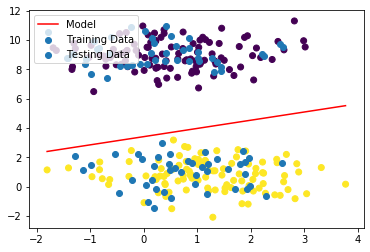

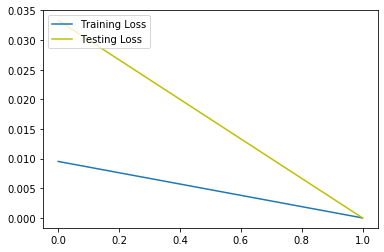

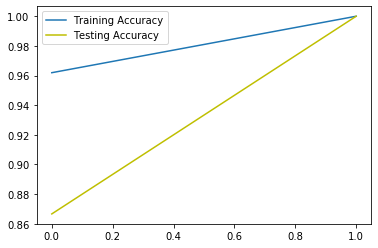

In [11]:
from src.modules.perceptron import Perceptron

# Before we use the data with the model it has to be modified, or rather modify the ys to be either 1 or -1
dataset.replace_output(lambda i, value: -1 if value == 0 else 1)

perceptron = Perceptron(
    training_inputs.copy(),
    training_outputs.copy(),
    testing_inputs.copy(),
    testing_outputs.copy()
)

plotter = Plotter(
    perceptron,
    training_inputs.copy(),
    training_outputs.copy(),
    testing_inputs.copy(),
    testing_outputs.copy()
)

perceptron.train()

plotter.scatter_data_for_classification(dataset.min(column='x_1'), dataset.max(column='x_1'))
plotter.plot_loss_evolution()
plotter.plot_accuracy_evolution()

The Model was able to separate the data at no time. And took 0 iterations to be able to split the data into two classes.

## Question6: Let’s make some noise on your dataset, take randomly 7% of the dataset that belongs to the class1 and change its label to the class2.

In [12]:
def noisify_data(_dataset, i, value, data_size):
    data_size = int(data_size * len(_dataset.outputs))

    if i <= data_size:
        return -1 if value == 1 else 1

    return value

dataset.replace_output(lambda i, value: noisify_data(dataset, i, value, 0.07))

## Question7: Fit and evaluate Adaline and Pocket algorithms with your dataset and interpret the results.

### Adaline

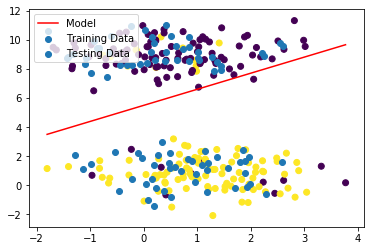

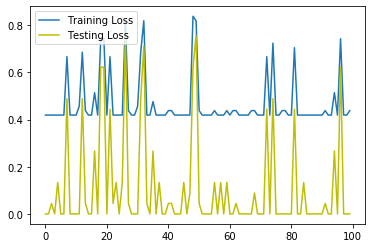

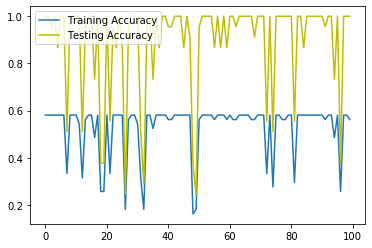

In [13]:
from src.modules.adaline import Adaline

adaline = Adaline(
    training_inputs.copy(),
    training_outputs.copy(),
    testing_inputs.copy(),
    testing_outputs.copy()
)

plotter = Plotter(
    adaline,
    training_inputs.copy(),
    training_outputs.copy(),
    testing_inputs.copy(),
    testing_outputs.copy()
)

adaline.train(max_iterations=100)

plotter.scatter_data_for_classification(dataset.min(column='x_1'), dataset.max(column='x_1'))
plotter.plot_loss_evolution()
plotter.plot_accuracy_evolution()

The adaline Model was able to seperate the data even with the noise that's included on it.

### Pocket

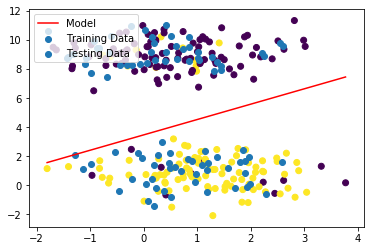

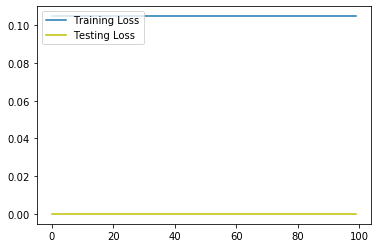

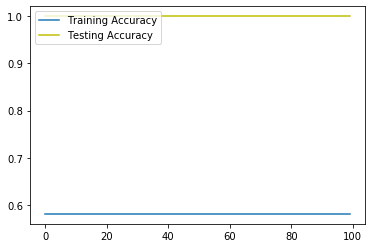

In [14]:
from src.modules.pocket import Pocket

pocket = Pocket(
    training_inputs.copy(),
    training_outputs.copy(),
    testing_inputs.copy(),
    testing_outputs.copy()
)

plotter = Plotter(
    pocket,
    training_inputs.copy(),
    training_outputs.copy(),
    testing_inputs.copy(),
    testing_outputs.copy()
)

pocket.train(max_iterations=100)

plotter.scatter_data_for_classification(dataset.min(column='x_1'), dataset.max(column='x_1'))
plotter.plot_loss_evolution()
plotter.plot_accuracy_evolution()

The Pocket Model was also able to separate the data even if the noise is included.

## Question8: Estimate generalization error (bias-variance) and interpret results

### Adaline

In [15]:
training_loss, testing_loss = adaline.get_loss()
training_accuracy, testing_accuracy = adaline.get_accuracy()

print(f"""Training Accuracy: {training_accuracy}, Training Loss: {training_loss}
Testing Accuracy: {testing_accuracy}, Testing Loss: {testing_loss}
""")

Training Accuracy: 0.5618650217706824, Training Loss: 0.4380952380952381
Testing Accuracy: 1.0, Testing Loss: 0.0



### Pocket

In [16]:
training_loss, testing_loss = pocket.get_loss()
training_accuracy, testing_accuracy = pocket.get_accuracy()

print(f"""Training Accuracy: {training_accuracy}, Training Loss: {training_loss}
Testing Accuracy: {testing_accuracy}, Testing Loss: {testing_loss}
""")

Training Accuracy: 0.580914368650218, Training Loss: 0.10476190476190476
Testing Accuracy: 1.0, Testing Loss: 0.0



## Question9: Is there any underfitting or overfitting? If your answer is yes, please precise which model(s) is (are) concerned and justify

Neither of the models are overfitting nor underfitting the results are good enough and they were able to seprate the data successfully.

## Question10: Which model(s) performs better? justify your choice.

Pocket and Adaline were able to work even with the noisy data where PLA would not work on this specific case.

## Question11: Determine VC dimension.

## Question12: Which learning type is?

## Question13: Calculate the generalization bounds.

## Question14: Calculate the accuracy, confidence parameter and sample complexity. Prove that training dataset was enough for the model to learn well

## Question15: Describe the logistic regression architecture and explain how it works.

## Question16: What is the loss function of the logistic regression algorithm?

The Logistic regression uses the Cross Entropy Loss function.

## Question17: Fit and evaluate the logistic regression model with your dataset and interpret results.

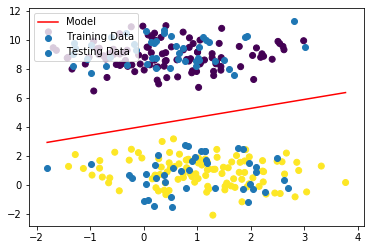

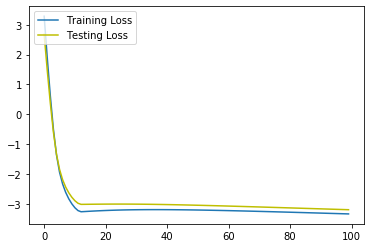

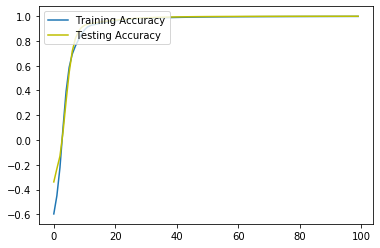

In [17]:
from src.modules.logistic_regression import LogisticRegression

dataset = Dataset(
    os.path.join(os.getcwd(), '../datasets/classification_data.csv'),
    ['x_1', 'x_2'],
    'y',
    shuffle=True
)

training_inputs, testing_inputs, training_outputs, testing_outputs = dataset.split_data(testing_size=0.3)

logistic_regression = LogisticRegression(
    training_inputs.copy(),
    training_outputs.copy(),
    testing_inputs.copy(),
    testing_outputs.copy()
)

plotter = Plotter(
    logistic_regression,
    training_inputs.copy(),
    training_outputs.copy(),
    testing_inputs.copy(),
    testing_outputs.copy()
)

logistic_regression.train(max_iterations=100, learning_rate=0.01)

plotter.scatter_data_for_classification(dataset.min(column='x_1'), dataset.max(column='x_1'))
plotter.plot_loss_evolution()
plotter.plot_accuracy_evolution()

In [18]:
training_loss, testing_loss = logistic_regression.get_loss()
training_accuracy, testing_accuracy = logistic_regression.get_accuracy()

print(f"""Training Accuracy: {training_accuracy}, Training Loss: {training_loss}
Testing Accuracy: {testing_accuracy}, Testing Loss: {testing_loss}
""")


Training Accuracy: 0.9976759136959039, Training Loss: -3.3397679872034347
Testing Accuracy: 0.9989532528959195, Testing Loss: -3.198828661532962



## Question18: Add a regularization method to your Logistic regression model and implement it.

We have implemented the regularization inside the dataset module.

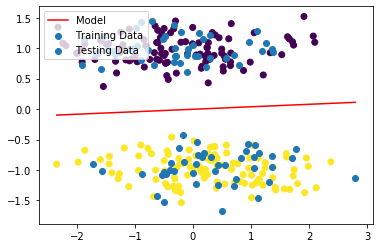

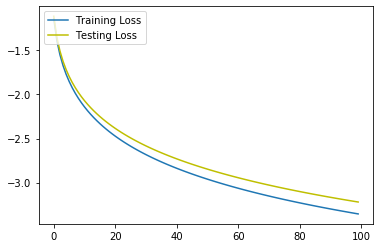

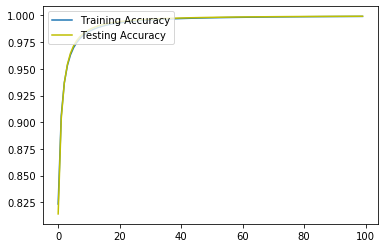

In [19]:
from src.modules.logistic_regression import LogisticRegression

dataset = Dataset(
    os.path.join(os.getcwd(), '../datasets/classification_data.csv'),
    ['x_1', 'x_2'],
    'y',
    shuffle=True
)

dataset.normalize(ignore_output=True)

training_inputs, testing_inputs, training_outputs, testing_outputs = dataset.split_data(testing_size=0.3)

logistic_regression = LogisticRegression(
    training_inputs.copy(),
    training_outputs.copy(),
    testing_inputs.copy(),
    testing_outputs.copy()
)

plotter = Plotter(
    logistic_regression,
    training_inputs.copy(),
    training_outputs.copy(),
    testing_inputs.copy(),
    testing_outputs.copy()
)

logistic_regression.train(max_iterations=100, learning_rate=0.01)

plotter.scatter_data_for_classification(dataset.min(column='x_1'), dataset.max(column='x_1'))
plotter.plot_loss_evolution()
plotter.plot_accuracy_evolution()

In [20]:
training_loss, testing_loss = logistic_regression.get_loss()
training_accuracy, testing_accuracy = logistic_regression.get_accuracy()

print(f"""Training Accuracy: {training_accuracy}, Training Loss: {training_loss}
Testing Accuracy: {testing_accuracy}, Testing Loss: {testing_loss}
""")


Training Accuracy: 0.9990970579403946, Training Loss: -3.3548875117746157
Testing Accuracy: 0.9992520580449984, Testing Loss: -3.2199394687654483

